In [32]:
from tensorflow.keras.preprocessing.text import one_hot
import nltk

In [102]:
sent=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',
       'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',
       'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',
       'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',
       'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',]

In [3]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [4]:
voc_size=10000

In [5]:
onehot_rep=[one_hot(word,voc_size) for word in sent]

In [6]:
onehot_rep

[[8086, 9164, 2360, 3681],
 [8086, 9164, 2360, 9897],
 [8086, 7526, 2360, 6122],
 [1824, 5434, 6308, 1149, 263],
 [1824, 5434, 6308, 1149, 3605],
 [9083, 8086, 7932, 2360, 4275],
 [9446, 6053, 7041, 1149]]

In [7]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [8]:
import numpy as np

In [9]:
sent_len=8
embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_len)
embedded_docs

array([[   0,    0,    0,    0, 8086, 9164, 2360, 3681],
       [   0,    0,    0,    0, 8086, 9164, 2360, 9897],
       [   0,    0,    0,    0, 8086, 7526, 2360, 6122],
       [   0,    0,    0, 1824, 5434, 6308, 1149,  263],
       [   0,    0,    0, 1824, 5434, 6308, 1149, 3605],
       [   0,    0,    0, 9083, 8086, 7932, 2360, 4275],
       [   0,    0,    0,    0, 9446, 6053, 7041, 1149]])

In [10]:
dim=15

In [11]:
model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_len))
model.compile('adam','mse')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 10)             100000    
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.predict(embedded_docs)[0]

array([[ 2.60213874e-02, -3.01560406e-02, -2.74621379e-02,
        -4.70143445e-02,  4.64676656e-02,  4.73259576e-02,
         2.39644907e-02,  1.54869445e-02, -4.13775817e-02,
        -2.86671873e-02],
       [ 2.60213874e-02, -3.01560406e-02, -2.74621379e-02,
        -4.70143445e-02,  4.64676656e-02,  4.73259576e-02,
         2.39644907e-02,  1.54869445e-02, -4.13775817e-02,
        -2.86671873e-02],
       [ 2.60213874e-02, -3.01560406e-02, -2.74621379e-02,
        -4.70143445e-02,  4.64676656e-02,  4.73259576e-02,
         2.39644907e-02,  1.54869445e-02, -4.13775817e-02,
        -2.86671873e-02],
       [ 2.60213874e-02, -3.01560406e-02, -2.74621379e-02,
        -4.70143445e-02,  4.64676656e-02,  4.73259576e-02,
         2.39644907e-02,  1.54869445e-02, -4.13775817e-02,
        -2.86671873e-02],
       [-1.89014915e-02,  3.09907235e-02,  8.76532868e-03,
         4.82825153e-02, -4.00388129e-02,  3.90108339e-02,
         9.20032337e-03, -1.41406879e-02, -4.79970351e-02,
         3.

In [16]:
embedded_docs[0]

array([   0,    0,    0,    0, 3401, 6031, 6582, 4291])

In [14]:
from keras.preprocessing.text import Tokenizer

In [15]:
tok=Tokenizer()

In [16]:
tok.fit_on_texts(sent)

In [20]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [39]:
tokz=tok.word_index
tokz

{'the': 1,
 'of': 2,
 'good': 3,
 'glass': 4,
 'i': 5,
 'am': 6,
 'a': 7,
 'milk': 8,
 'juice': 9,
 'cup': 10,
 'tea': 11,
 'boy': 12,
 'developer': 13,
 'understand': 14,
 'meaning': 15,
 'words': 16,
 'your': 17,
 'videos': 18,
 'are': 19}

In [103]:
tokens=[nltk.word_tokenize(sents) for sents in sent]

In [104]:
tokens

[['the', 'glass', 'of', 'milk'],
 ['the', 'glass', 'of', 'juice'],
 ['the', 'cup', 'of', 'tea'],
 ['I', 'am', 'a', 'good', 'boy'],
 ['I', 'am', 'a', 'good', 'developer'],
 ['understand', 'the', 'meaning', 'of', 'words'],
 ['your', 'videos', 'are', 'good'],
 ['the', 'glass', 'of', 'milk'],
 ['the', 'glass', 'of', 'juice'],
 ['the', 'cup', 'of', 'tea'],
 ['I', 'am', 'a', 'good', 'boy'],
 ['I', 'am', 'a', 'good', 'developer'],
 ['understand', 'the', 'meaning', 'of', 'words'],
 ['your', 'videos', 'are', 'good'],
 ['the', 'glass', 'of', 'milk'],
 ['the', 'glass', 'of', 'juice'],
 ['the', 'cup', 'of', 'tea'],
 ['I', 'am', 'a', 'good', 'boy'],
 ['I', 'am', 'a', 'good', 'developer'],
 ['understand', 'the', 'meaning', 'of', 'words'],
 ['your', 'videos', 'are', 'good'],
 ['the', 'glass', 'of', 'milk'],
 ['the', 'glass', 'of', 'juice'],
 ['the', 'cup', 'of', 'tea'],
 ['I', 'am', 'a', 'good', 'boy'],
 ['I', 'am', 'a', 'good', 'developer'],
 ['understand', 'the', 'meaning', 'of', 'words'],
 ['your'

In [40]:
toknsz=set([sentz.lower() for texts in tokens for sentz in texts])
toknsz

{'a',
 'am',
 'are',
 'boy',
 'cup',
 'developer',
 'glass',
 'good',
 'i',
 'juice',
 'meaning',
 'milk',
 'of',
 'tea',
 'the',
 'understand',
 'videos',
 'words',
 'your'}

In [94]:
toknsz=list(toknsz)
toknsz

['good',
 'words',
 'am',
 'tea',
 'juice',
 'the',
 'your',
 'i',
 'glass',
 'boy',
 'milk',
 'cup',
 'videos',
 'understand',
 'meaning',
 'of',
 'a',
 'developer',
 'are']

In [42]:
len(tokz),len(toknsz)

(19, 19)

In [43]:
for i in tok.word_index.items():
    print(i)

('the', 1)
('of', 2)
('good', 3)
('glass', 4)
('i', 5)
('am', 6)
('a', 7)
('milk', 8)
('juice', 9)
('cup', 10)
('tea', 11)
('boy', 12)
('developer', 13)
('understand', 14)
('meaning', 15)
('words', 16)
('your', 17)
('videos', 18)
('are', 19)


In [68]:
from gensim.models.word2vec import Word2Vec

In [143]:
w2v=Word2Vec(size=2,window=2)
w2v.build_vocab(tokens)

In [144]:
keys=w2v.wv.vocab.keys()
keys

dict_keys(['the', 'glass', 'of', 'milk', 'juice', 'cup', 'tea', 'I', 'am', 'a', 'good', 'boy', 'developer', 'understand', 'meaning', 'words', 'your', 'videos', 'are'])

In [145]:
w2v.train(sent,total_examples=len(sent),epochs=10000)

(83421, 6800000)

In [146]:
keys=list(keys)

In [147]:
values=[w2v.wv.get_vector(key) for key in keys]

In [148]:
import matplotlib.pyplot as pl

In [149]:
import numpy as np
values=np.array(values)

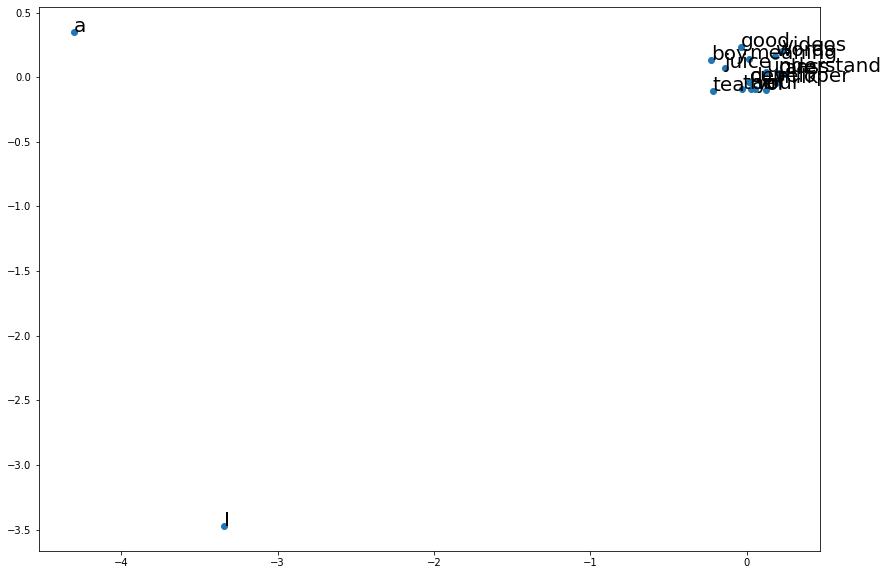

In [150]:
pl.figure(figsize=(14,10))
pl.scatter(values[:,0],values[:,1])
for i,j in zip(keys,values):
    
    pl.text(j[0],j[1],i,fontsize=20)

In [151]:
values[0]

array([-0.02947344, -0.08894851], dtype=float32)

In [152]:
sent[:7]

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']